# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_mask_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'rpn_class_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [4]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


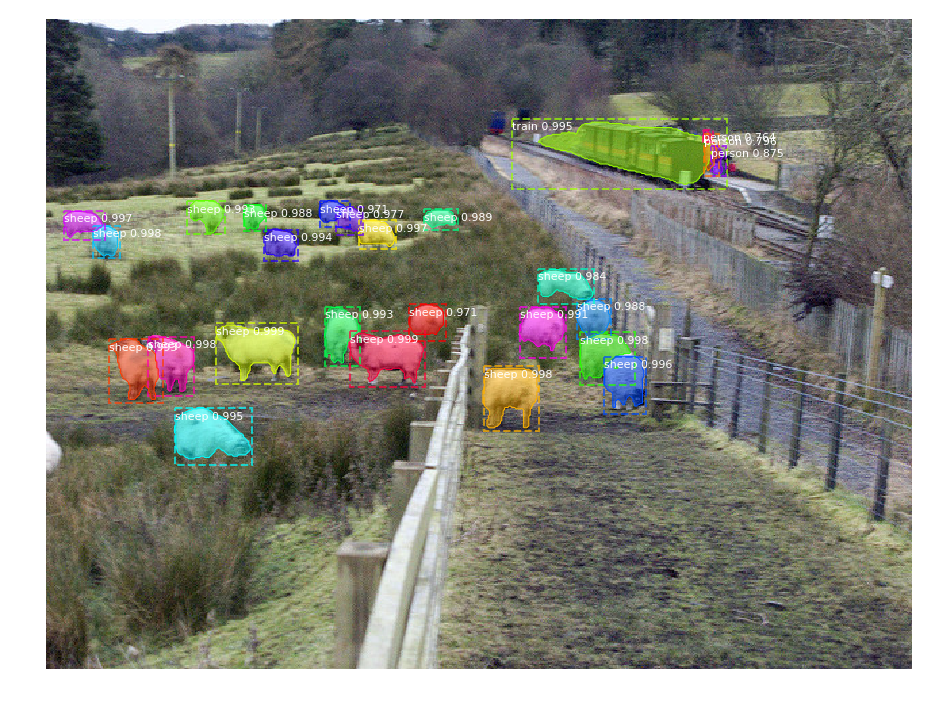

In [5]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [6]:
import os

data_dir = '/media/ferdyan/NewDisk/Dataset/KITTI_Raw/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/'
save_folder = '/media/ferdyan/NewDisk/Dataset/KITTI_Raw/2011_09_26/2011_09_26_drive_0001_sync/image_02_new/data/'

img_dir = os.listdir(data_dir)
img_dir.sort()

print(img_dir)

for i, gambar_img in enumerate(img_dir):
    raw = os.path.splitext(gambar_img)[0].split(".")[0] \
            + os.path.splitext(gambar_img)[1]
    print(raw)
    img = skimage.io.imread(os.path.join(data_dir, raw))
    
    results = model.detect([img], verbose=1)
    
    r = results[0]
    
    detected = r['class_ids'].size
    
    print(detected)
    
    for i in range(detected):
        # if r['class_ids'][i] != 3 or r['class_ids'][i] != 6 or r['class_ids'][i] != 8:
        # if r['class_ids'][i] != 3:
        #if r['class_ids'][i] != 3:
        #    r['class_ids'][i] = 0
        #    r['rois'][i] = 0
        #    r['masks'][i] = 0
        #    r['scores'][i] = 0
            
        if r['class_ids'][i] == 3:
            continue
        elif r['class_ids'][i] == 6:
            continue
        elif r['class_ids'][i] == 8:
            continue
        else :
            r['class_ids'][i] = 0
            r['rois'][i] = 0
            r['masks'][i] = 0
            r['scores'][i] = 0
    
    print("raw = ", raw)
    raw_name = raw.split('.')
    a = visualize.save_image(img, raw_name[0], r['rois'], r['masks'], r['class_ids'], r['scores'], class_names, save_dir=save_folder, mode=3) 
    import cv2
    if a == None :
        black = np.zeros(image.shape).astype(np.uint8)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        print("he")
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    else:
        print("aa = ", raw)
        black = cv2.imread(save_folder+raw)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    
    #np.asarray(a)
    #image_data = image_data.as
    #a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("a", a)
    #cv2.waitKey(0)
#for i in range(len(img_dir)):
#    raw = os.path.splitext()

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

2
raw =  0012.png
aa =  0012.png
0013.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  134.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0013.png
aa =  0013.png
0014.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  134.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0014.png
aa =  0014.png
0015.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0031.png
aa =  0031.png
0032.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  132.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0032.png
aa =  0032.png
0033.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0033.png
aa =  0033.png
0034.png
Processing 1 images
image                    shape: (385, 1280, 3)    

2
raw =  0050.png
aa =  0050.png
0051.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  133.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0051.png
aa =  0051.png
0052.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0052.png
aa =  0052.png
0053.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0069.png
aa =  0069.png
0070.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0070.png
aa =  0070.png
0071.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0071.png
aa =  0071.png
0072.png
Processing 1 images
image                    shape: (385, 1280, 3)    

4
raw =  0088.png
aa =  0088.png
0089.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  135.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0089.png
aa =  0089.png
0090.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  136.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0090.png
aa =  0090.png
0091.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0107.png
aa =  0107.png
0108.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  137.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0108.png
aa =  0108.png
0109.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  133.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0109.png
aa =  0109.png
0110.png
Processing 1 images
image                    shape: (385, 1280, 3)    

2
raw =  0126.png
aa =  0126.png
0127.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0127.png
aa =  0127.png
0128.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0128.png
aa =  0128.png
0129.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0145.png
aa =  0145.png
0146.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  136.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0146.png
aa =  0146.png
0147.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  135.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0147.png
aa =  0147.png
0148.png
Processing 1 images
image                    shape: (385, 1280, 3)    

4
raw =  0164.png
aa =  0164.png
0165.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  137.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0165.png
aa =  0165.png
0166.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  137.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0166.png
aa =  0166.png
0167.png
Processing 1 images
image                    shape: (385, 1280, 3)    

7
raw =  0183.png
aa =  0183.png
0184.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  138.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0184.png
aa =  0184.png
0185.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  138.20000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0185.png
aa =  0185.png
0186.png
Processing 1 images
image                    shape: (385, 1280, 3)    

2
raw =  0202.png
aa =  0202.png
0203.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0203.png
aa =  0203.png
0204.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0204.png
aa =  0204.png


In [55]:
import os

data_dir = '/media/ferdyan/NewDisk/Mask/Siap/raw/29/images/'
save_folder = '/media/ferdyan/NewDisk/Mask/Siap/raw/29/mask/'

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

img_dir = os.listdir(data_dir)
img_dir.sort()

print(img_dir)

for i, gambar_img in enumerate(img_dir):
    raw = os.path.splitext(gambar_img)[0].split(".")[0] \
            + os.path.splitext(gambar_img)[1]
    print(raw)
    img = skimage.io.imread(os.path.join(data_dir, raw))
    
    results = model.detect([img], verbose=1)
    
    r = results[0]
    
    detected = r['class_ids'].size
    
    print(detected)
    
    for i in range(detected):
        # if r['class_ids'][i] != 3 or r['class_ids'][i] != 6 or r['class_ids'][i] != 8:
        # if r['class_ids'][i] != 3:
        #if r['class_ids'][i] != 3:
        #    r['class_ids'][i] = 0
        #    r['rois'][i] = 0
        #    r['masks'][i] = 0
        #    r['scores'][i] = 0
            
        if r['class_ids'][i] == 3:
            continue
        elif r['class_ids'][i] == 6:
            continue
        elif r['class_ids'][i] == 8:
            continue
        else :
            r['class_ids'][i] = 0
            r['rois'][i] = 0
            r['masks'][i] = 0
            r['scores'][i] = 0
    
    print("raw = ", raw)
    raw_name = raw.split('.')
    a = visualize.save_image(img, raw_name[0], r['rois'], r['masks'], r['class_ids'], r['scores'], class_names, save_dir=save_folder, mode=3) 
    import cv2
    if a == None :
        # black = np.zeros(image.shape).astype(np.uint8)
        black = np.zeros((385, 1280, 3)).astype(np.uint8)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        print("he")
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    else:
        print("aa = ", raw)
        black = cv2.imread(save_folder+raw)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    
    #np.asarray(a)
    #image_data = image_data.as
    #a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("a", a)
    #cv2.waitKey(0)
#for i in range(len(img_dir)):
#    raw = os.path.splitext()

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

2
raw =  0015.png
aa =  0015.png
0016.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0016.png
aa =  0016.png
0017.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0017.png
aa =  0017.png
0018.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0034.png
aa =  0034.png
0035.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0035.png
aa =  0035.png
0036.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0036.png
aa =  0036.png
0037.png
Processing 1 images
image                    shape: (385, 1280, 3)    

4
raw =  0053.png
aa =  0053.png
0054.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0054.png
aa =  0054.png
0055.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0055.png
aa =  0055.png
0056.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0072.png
aa =  0072.png
0073.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0073.png
aa =  0073.png
0074.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0074.png
aa =  0074.png
0075.png
Processing 1 images
image                    shape: (385, 1280, 3)    

1
raw =  0091.png
aa =  0091.png
0092.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
raw =  0092.png
aa =  0092.png
0093.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
raw =  0093.png
aa =  0093.png
0094.png
Processing 1 images
image                    shape: (385, 1280, 3)    

In [54]:
import os

data_dir = '/media/ferdyan/NewDisk/Mask/Siap/raw/24/images/'
save_folder = '/media/ferdyan/NewDisk/Mask/Siap/raw/24/mask/'

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

img_dir = os.listdir(data_dir)
img_dir.sort()

print(img_dir)

for i, gambar_img in enumerate(img_dir):
    raw = os.path.splitext(gambar_img)[0].split(".")[0] \
            + os.path.splitext(gambar_img)[1]
    print(raw)
    img = skimage.io.imread(os.path.join(data_dir, raw))
    
    results = model.detect([img], verbose=1)
    
    r = results[0]
    
    detected = r['class_ids'].size
    
    print(detected)
    
    for i in range(detected):
        # if r['class_ids'][i] != 3 or r['class_ids'][i] != 6 or r['class_ids'][i] != 8:
        # if r['class_ids'][i] != 3:
        #if r['class_ids'][i] != 3:
        #    r['class_ids'][i] = 0
        #    r['rois'][i] = 0
        #    r['masks'][i] = 0
        #    r['scores'][i] = 0
            
        if r['class_ids'][i] == 3:
            continue
        elif r['class_ids'][i] == 6:
            continue
        elif r['class_ids'][i] == 8:
            continue
        else :
            r['class_ids'][i] = 0
            r['rois'][i] = 0
            r['masks'][i] = 0
            r['scores'][i] = 0
    
    print("raw = ", raw)
    raw_name = raw.split('.')
    a = visualize.save_image(img, raw_name[0], r['rois'], r['masks'], r['class_ids'], r['scores'], class_names, save_dir=save_folder, mode=3) 
    import cv2
    if a == None :
        # black = np.zeros(image.shape).astype(np.uint8)
        black = np.zeros((385, 1280, 3)).astype(np.uint8)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        print("he")
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    else:
        print("aa = ", raw)
        black = cv2.imread(save_folder+raw)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    
    #np.asarray(a)
    #image_data = image_data.as
    #a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("a", a)
    #cv2.waitKey(0)
#for i in range(len(img_dir)):
#    raw = os.path.splitext()

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

1
raw =  0015.png
aa =  0015.png
0016.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0016.png
aa =  0016.png
0017.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0017.png
aa =  0017.png
0018.png
Processing 1 images
image                    shape: (385, 1280, 3)    

2
raw =  0034.png
aa =  0034.png
0035.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
1
raw =  0035.png
aa =  0035.png
0036.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0036.png
aa =  0036.png
0037.png
Processing 1 images
image                    shape: (385, 1280, 3)    

4
raw =  0053.png
aa =  0053.png
0054.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0054.png
aa =  0054.png
0055.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0055.png
aa =  0055.png
0056.png
Processing 1 images
image                    shape: (385, 1280, 3)    

2
raw =  0072.png
aa =  0072.png
0073.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
2
raw =  0073.png
aa =  0073.png
0074.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0074.png
aa =  0074.png
0075.png
Processing 1 images
image                    shape: (385, 1280, 3)    

3
raw =  0091.png
aa =  0091.png
0092.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
4
raw =  0092.png
aa =  0092.png
0093.png
Processing 1 images
image                    shape: (385, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3
raw =  0093.png
aa =  0093.png
0094.png
Processing 1 images
image                    shape: (385, 1280, 3)    

In [ ]:
test = cv2.imread("/media/ferdyan/NewDisk/Mask_RCNN-master/save/0001.png")
print(test.shape)